<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Hands-on Lab : Web Scraping**


Estimated time needed: **30 to 45** minutes


## Objectives


In this lab you will perform the following:


* Extract information from a given web site 
* Write the scraped data into a csv file.


## Extract information from the given web site
You will extract the data from the below web site: <br> 


In [1]:
#this url contains the data you need to scrape
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/Programming_Languages.html"

The data you need to scrape is the **name of the programming language** and **average annual salary**.<br> It is a good idea to open the url in your web broswer and study the contents of the web page before you start to scrape.


Import the required libraries


In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

Download the webpage at the url


In [2]:
# Define the URL
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/Programming_Languages.html"

# Send an HTTP GET request to the URL
response = requests.get(url)

Create a soup object


In [3]:
soup = BeautifulSoup(response.text, 'html.parser')

Scrape the `Language name` and `annual average salary`.


In [4]:
# Find the table with the desired data
table = soup.find('table')

# Create empty lists to store the data
languages = []
salaries = []

for row in table.find_all('tr')[1:]:
    # Extract the columns (td elements) from each row
    columns = row.find_all('td')

    # Get the Language (first column)
    language = columns[1].get_text(strip=True)

    # Get the Average Annual Salary (second column)
    salary = columns[3].get_text(strip=True)

    # Append the data to the respective lists
    languages.append(language)
    salaries.append(salary)

Save the scrapped data into a file named *popular-languages.csv*


In [5]:
# Create a DataFrame from the scraped data
data = pd.DataFrame({'Language': languages, 'Average Annual Salary': salaries})

# Save the DataFrame to a CSV file
data.to_csv('popular-languages.csv', index=False)

In [6]:
data

,Language,Average Annual Salary
0,Python,"$114,383"
1,Java,"$101,013"
2,R,"$92,037"
3,Javascript,"$110,981"
4,Swift,"$130,801"
5,C++,"$113,865"
6,C#,"$88,726"
7,PHP,"$84,727"
8,SQL,"$84,793"
9,Go,"$94,082"


C:\Users\mrwoo\AppData\Local\Temp\ipykernel_29216\1900417511.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["${:,.0f}".format(x) for x in ax.get_xticks()])


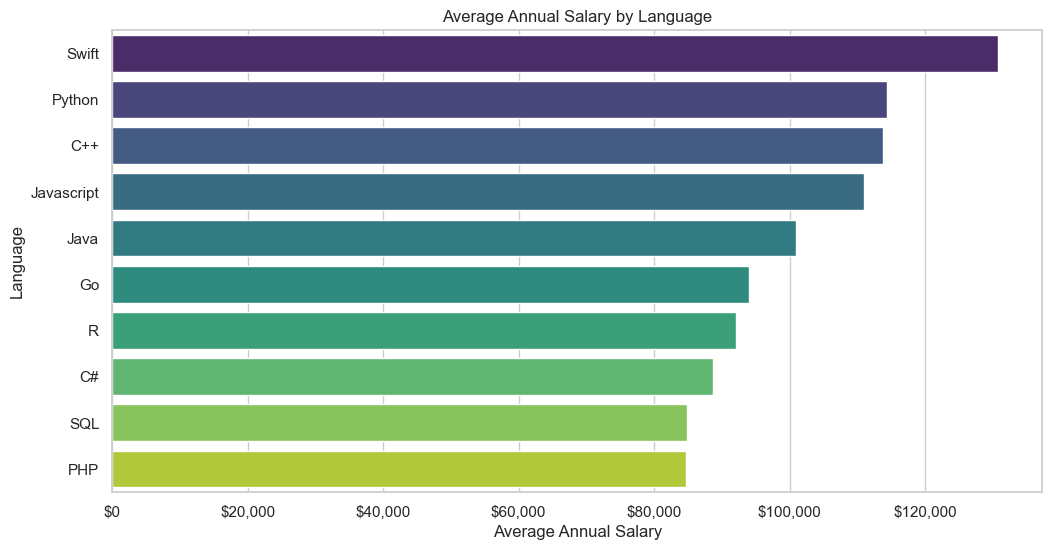

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert the "Average Annual Salary" column to string
data["Average Annual Salary"] = data["Average Annual Salary"].astype(str)

# Remove any non-numeric characters and convert to float
data["Average Annual Salary"] = data["Average Annual Salary"].str.replace("$", "").str.replace(",", "").astype(float)

# Set the style of the plot (optional)
sns.set(style="whitegrid")

# Sort the data by "Average Annual Salary" in descending order
data = data.sort_values(by="Average Annual Salary", ascending=False)

# Create a bar plot
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed

# Use Seaborn's barplot function to create the bar chart
ax = sns.barplot(x="Average Annual Salary", 
                 y="Language", 
                 data=data, 
                 palette="viridis")

# Set labels and title
plt.xlabel("Average Annual Salary")
plt.ylabel("Language")
plt.title("Average Annual Salary by Language")

# Add "$" to the x-axis ticks
ax.set_xticklabels(["${:,.0f}".format(x) for x in ax.get_xticks()])

# Show the plot
plt.show()


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2020-10-17  | 0.1  | Ramesh Sannareddy  |  Created initial version of the lab |


 Copyright &copy; 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2022-01-01).
